## The Client

XYZ is a private firm in US. Due to remarkable growth in the Cab Industry in last few years and multiple key players in the market, it is planning for an investment in Cab industry and as per their Go-to-Market(G2M) strategy they want to understand the market before taking final decision.

## Project delivery:

You have been provided with multiple data sets that contains information on 2 cab companies. Each file (data set) provided represents different aspects of the customer profile. XYZ is interested in using your actionable insights to help them identify the right company to make their investment.

The outcome of your delivery will be a presentation to XYZ’s Executive team. This presentation will be judged based on the visuals provided, the quality of your analysis and the value of your recommendations and insights. 

## Data Set:

You have been provided 4 individual data sets. Time period of data is from 31/01/2016 to 31/12/2018.

Below are the list of datasets which are provided for the analysis:

Cab_Data.csv – this file includes details of transaction for 2 cab companies

Customer_ID.csv – this is a mapping table that contains a unique identifier which links the customer’s demographic details

Transaction_ID.csv – this is a mapping table that contains transaction to customer mapping and payment mode

City.csv – this file contains list of US cities, their population and number of cab users

You should fully investigate and understand each data set.

- Review the Source Documentation  
- Understand the field names and data types  
- Identify relationships across the files  
- Field/feature transformations  
- Determine which files should be joined versus which ones should be appended  
- Create master data and explain the relationship  
- Identify and remove duplicates  
- Perform other analysis like NA value and outlier detection  
 

Whatever and how many slides you prepare(Be creative and come up with meaningful insight):

The idea is to create a hypothesis, engage with the data, think critically, and use various analytical approaches to produce unique insights.

You are not limited to only utilizing the data you have been provided.

We encourage you to find third party data sets which correspond to the overall theme and geographical properties of the data provided.  For Example: you can leverage US holiday data/ weather data

Also, do research on overall cab industry in US and try to relate that with the trend in data

## Analysis  

Create multiple hypothesis and investigate:

**You will need to generate 5-7 hypothesis initially to investigate as some will not prove what you are expecting.**  

For Example: “Is there any seasonality in number of customers using the cab service?”

### Areas to investigate:

- Which company has maximum cab users at a particular time period?  
- Does margin proportionally increase with increase in number of customers?  
- What are the attributes of these customer segments?  

**Although not required, we encourage you to document the process and findings**  
- What is the business problem?  
- What are the properties of the data provided (data intake report)  
- What steps did you take in order to create an applicable data set?  
- How did you prepare and perform your analysis?  
- What type of analysis did you perform?  
- Why did you choose to use certain analytical techniques over others?  
- What were the results?  
- Prepare a presentation that summarizes your analysis and recommendations and identify which company is performing better and is a better investment opportunity for XYZ.

#### Deliverables of Week 2 are:

1. EDA Notebook (ipynb file)

2. Data Intake report (pdf file)

3. EDA recommendation and hypothesis results ( It should be in the ipynb notebook and you don't need not to present separate document) 

You can use either EDA or Modeling and EDA both to deliver the result.

Remember, there are no wrong answers as long as the data supports them.

Note: Sample presentation of previous batch intern, for your reference is added

In [35]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

### Data

#### Data Fields
    
<img src="ERD.png" alt="Drawing" style="width: 500px;"/>

In [36]:
# Load in data
transaction_data = pd.read_csv('data/Transaction_ID.csv')
city_data = pd.read_csv('data/City.csv', thousands=',') # thousands=',' is used to remove the comma in the population column
cab_data = pd.read_csv('data/Cab_Data.csv')
customer_data = pd.read_csv('data/Customer_ID.csv')


#### Null Values: None

In [37]:
transaction_data.isna().sum()

Transaction ID    0
Customer ID       0
Payment_Mode      0
dtype: int64

In [38]:
city_data.isna().sum()

City          0
Population    0
Users         0
dtype: int64

In [39]:
cab_data.isna().sum()

Transaction ID    0
Date of Travel    0
Company           0
City              0
KM Travelled      0
Price Charged     0
Cost of Trip      0
dtype: int64

In [40]:
customer_data.isna().sum()

Customer ID           0
Gender                0
Age                   0
Income (USD/Month)    0
dtype: int64

#### Transaction_ID.csv

In [41]:
transaction_data.head()

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card


In [42]:
# fix column names for easier reference
transaction_data.rename({'Transaction ID': 'transaction_id', 'Customer ID': 'customer_id', 'Payment_Mode': 'payment_mode'}, axis='columns', inplace=True)

In [43]:
transaction_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440098 entries, 0 to 440097
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   transaction_id  440098 non-null  int64 
 1   customer_id     440098 non-null  int64 
 2   payment_mode    440098 non-null  object
dtypes: int64(2), object(1)
memory usage: 10.1+ MB


***Observations:***  
transaction and customer ID columns are categorical - switch to object

In [44]:
transaction_data = transaction_data.astype({"transaction_id": object, "customer_id": object})

In [45]:
transaction_data.payment_mode.value_counts(normalize=True)*100

Card    59.984594
Cash    40.015406
Name: payment_mode, dtype: float64

In [46]:
transaction_data.customer_id.value_counts(normalize=True).sort_values(ascending=False).head()

494     0.000123
2939    0.000120
1070    0.000116
2766    0.000116
1628    0.000114
Name: customer_id, dtype: float64

No anomolous users.

#### city_data.csv

In [47]:
city_data.head()

,City,Population,Users
0,NEW YORK NY,8405837,302149
1,CHICAGO IL,1955130,164468
2,LOS ANGELES CA,1595037,144132
3,MIAMI FL,1339155,17675
4,SILICON VALLEY,1177609,27247


In [48]:
# fix column names for easier reference
city_data.rename({'City': 'city', 'Population': 'population', 'Users': 'users'}, axis='columns', inplace=True)

In [49]:
city_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   city        20 non-null     object
 1   population  20 non-null     int64 
 2   users       20 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 608.0+ bytes


In [50]:
city_data.sort_values(by='population', ascending=False).head()

,city,population,users
0,NEW YORK NY,8405837,302149
1,CHICAGO IL,1955130,164468
2,LOS ANGELES CA,1595037,144132
3,MIAMI FL,1339155,17675
4,SILICON VALLEY,1177609,27247


''

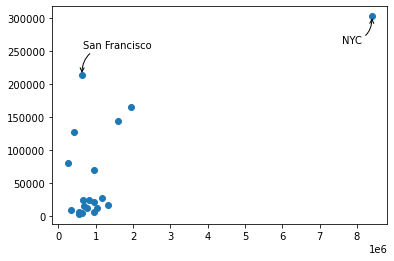

In [51]:
fig, ax = plt.subplots()
ax.scatter(x='population', y='users', data = city_data)

# label NEW YORK NY
city = "NYC"
x = city_data.population[city_data.city=='NEW YORK NY']
y = city_data.users[city_data.city=='NEW YORK NY']
ax.annotate(city, (x, y), xytext=(x-800000, y-40000), 
    arrowprops = dict(  arrowstyle="->",
                        connectionstyle="angle3,angleA=0,angleB=-90"))

# label San francisco
city = "San Francisco"
x = city_data.population[city_data.city=='SAN FRANCISCO CA']
y = city_data.users[city_data.city=='SAN FRANCISCO CA']

ax.annotate(city, (x, y), xytext=(x+40000, y+40000), 
    arrowprops = dict(  arrowstyle="->",
                        connectionstyle="angle3,angleA=0,angleB=-90"))
;

New York City has the highest population and user count, but San Francisco has one of the lowest populations with the 2nd greatest user count.

#### cab_data.csv

In [52]:
cab_data.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776


In [53]:
# fix column names for easier reference
cab_data.rename({'Transaction ID': 'transaction_id', 'Date of Travel': 'date', 'Company': 'company', 
    'City': 'city', 'KM Travelled': 'km_traveled', 'Price Charged': 'income', 'Cost of Trip': 'expense'}, axis='columns', inplace=True)

In [54]:
cab_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   transaction_id  359392 non-null  int64  
 1   date            359392 non-null  int64  
 2   company         359392 non-null  object 
 3   city            359392 non-null  object 
 4   km_traveled     359392 non-null  float64
 5   income          359392 non-null  float64
 6   expense         359392 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 19.2+ MB


***Observations:***  
- transaction ID should be object
- date columns are not date type; need to be converted form excel format
- There is a price and cost column.  My **assumption** is that price is income, cost is expense.  Need to create a profit column (rename columns appropriately) 

In [55]:
cab_data = cab_data.astype({"transaction_id": object})

In [56]:
cab_data['profit'] = cab_data.income - cab_data.expense

In [57]:
import xlrd

# utility function that extracts date from excel date format
def read_date(date):
    return xlrd.xldate.xldate_as_datetime(date, 0)

cab_data['date']= pd.to_datetime(cab_data['date'].apply(read_date), errors='coerce')


##### Check the date range

In [58]:
cab_data['date'].min()

Timestamp('2016-01-02 00:00:00')

In [59]:
cab_data['date'].max()

Timestamp('2018-12-31 00:00:00')

##### Analyze the money

In [70]:
cab_data.corr()

,km_traveled,income,expense,profit
km_traveled,1.000000,0.835753,0.981848,0.462768
income,0.835753,1.000000,0.859812,0.864154
expense,0.981848,0.859812,1.000000,0.486056
profit,0.462768,0.864154,0.486056,1.000000


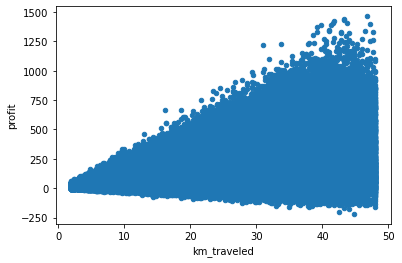

In [77]:
cab_data.plot(kind='scatter', x='km_traveled', y='profit');


#### customer_data.csv

In [60]:
customer_data.head()

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


In [61]:
# fix column names for easier reference
customer_data.rename({'Customer ID': 'customer_id', 'Gender': 'gender', 'Age': 'age', 'Income (USD/Month)': 'income'}, axis='columns', inplace=True)

In [62]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49171 entries, 0 to 49170
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   customer_id  49171 non-null  int64 
 1   gender       49171 non-null  object
 2   age          49171 non-null  int64 
 3   income       49171 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


***Observations:***  
- transaction ID should be object
- date columns are not date type; need to be converted form excel format


In [63]:
customer_data = customer_data.astype({"customer_id": object})

In [64]:
customer_data.gender.value_counts(normalize=True)*100

Male      54.019646
Female    45.980354
Name: gender, dtype: float64

In [65]:
customer_data.age.describe()

count    49171.000000
mean        35.363121
std         12.599066
min         18.000000
25%         25.000000
50%         33.000000
75%         42.000000
max         65.000000
Name: age, dtype: float64

<AxesSubplot:>

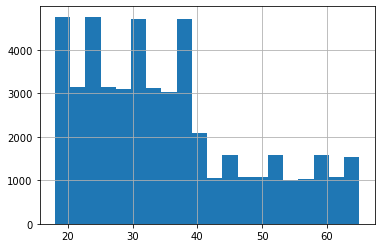

In [66]:
customer_data.age.hist(bins=20)          

In [67]:
customer_data.income.describe()

count    49171.000000
mean     15015.631856
std       8002.208253
min       2000.000000
25%       8289.500000
50%      14656.000000
75%      21035.000000
max      35000.000000
Name: income, dtype: float64

<AxesSubplot:>

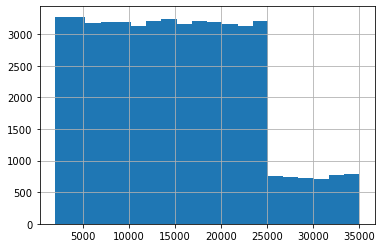

In [68]:
customer_data.income.hist(bins=20)          

,age,income
age,1.000000,0.000156
income,0.000156,1.000000


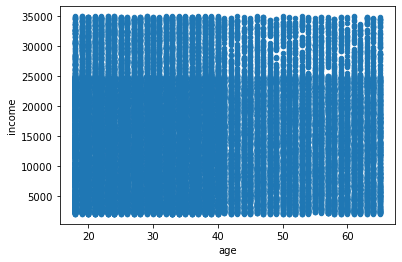

In [69]:
customer_data.plot(kind='scatter', x='age', y='income')
customer_data.corr()